In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data1990_1999 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate19901999.csv')
data2000_2012 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
data2012_2014 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
data2015_2016 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
data2017_0000 = pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [3]:
data = pd.concat([data1990_1999,data2000_2012, data2012_2014, data2015_2016,data2017_0000 ])

In [4]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [5]:
data=data.drop(['block', 'street_name', 'remaining_lease'], axis = 1)

In [6]:
data['flat_model'] = data['flat_model'].apply(str.upper)

In [7]:
data['month'] = pd.to_datetime(data['month'])

In [8]:
data['sales_year'] = data['month'].apply(lambda x: x.year)

In [9]:
data['sales_month'] = data['month'].apply(lambda x: x.month)

In [10]:
data.drop('month', axis = 1, inplace = True)

In [11]:
data

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,sales_year,sales_month
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1
2,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1
3,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1
4,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1
...,...,...,...,...,...,...,...,...,...
165274,YISHUN,4 ROOM,04 TO 06,104.0,MODEL A,1988,520000.0,2023,11
165275,YISHUN,4 ROOM,04 TO 06,104.0,MODEL A,1988,520000.0,2023,11
165276,YISHUN,5 ROOM,04 TO 06,112.0,IMPROVED,2015,645000.0,2023,11
165277,YISHUN,5 ROOM,13 TO 15,113.0,PREMIUM APARTMENT,2016,700000.0,2023,11


In [12]:
def simplify_storey_range(range_str):
    if 'TO' in range_str:
        start, end = map(int, range_str.split(' TO '))
        if start <= 5:
            return 'Low-Rise'
        elif 6 <= start <= 15:
            return 'Mid-Rise'
        elif 16 <= start <= 50:
            return 'High-Rise'
        else:
            return 'Skyscraper'
    else:
        return 'Unknown'

# Apply the function to the 'storey_range' column
data['storey_range'] = data['storey_range'].apply(simplify_storey_range)

# Print the updated DataFrame
print(data)

              town  flat_type storey_range  floor_area_sqm         flat_model  \
0       ANG MO KIO     1 ROOM     Mid-Rise            31.0           IMPROVED   
1       ANG MO KIO     1 ROOM     Low-Rise            31.0           IMPROVED   
2       ANG MO KIO     1 ROOM     Mid-Rise            31.0           IMPROVED   
3       ANG MO KIO     1 ROOM     Mid-Rise            31.0           IMPROVED   
4       ANG MO KIO     3 ROOM     Low-Rise            73.0     NEW GENERATION   
...            ...        ...          ...             ...                ...   
165274      YISHUN     4 ROOM     Low-Rise           104.0            MODEL A   
165275      YISHUN     4 ROOM     Low-Rise           104.0            MODEL A   
165276      YISHUN     5 ROOM     Low-Rise           112.0           IMPROVED   
165277      YISHUN     5 ROOM     Mid-Rise           113.0  PREMIUM APARTMENT   
165278      YISHUN  EXECUTIVE     Low-Rise           142.0          APARTMENT   

        lease_commence_date

In [13]:
import pandas as pd




# Define a function to convert a date to a quarter
def convert_to_quarter(month):
    if month <= 3:
        return "Q1"
    elif month <= 6:
        return "Q2"
    elif month <= 9:
        return "Q3"
    else:
        return "Q4"

# Apply the function to the 'Date' column to create a new 'Quarter' column
data['sales_month'] = data['sales_month'].apply(convert_to_quarter)

# Print the resulting DataFrame
print(data)


              town  flat_type storey_range  floor_area_sqm         flat_model  \
0       ANG MO KIO     1 ROOM     Mid-Rise            31.0           IMPROVED   
1       ANG MO KIO     1 ROOM     Low-Rise            31.0           IMPROVED   
2       ANG MO KIO     1 ROOM     Mid-Rise            31.0           IMPROVED   
3       ANG MO KIO     1 ROOM     Mid-Rise            31.0           IMPROVED   
4       ANG MO KIO     3 ROOM     Low-Rise            73.0     NEW GENERATION   
...            ...        ...          ...             ...                ...   
165274      YISHUN     4 ROOM     Low-Rise           104.0            MODEL A   
165275      YISHUN     4 ROOM     Low-Rise           104.0            MODEL A   
165276      YISHUN     5 ROOM     Low-Rise           112.0           IMPROVED   
165277      YISHUN     5 ROOM     Mid-Rise           113.0  PREMIUM APARTMENT   
165278      YISHUN  EXECUTIVE     Low-Rise           142.0          APARTMENT   

        lease_commence_date

In [14]:
data.shape

(911482, 9)

In [15]:
data.groupby('sales_month')['sales_month'].agg('count')

sales_month
Q1    216808
Q2    226274
Q3    239179
Q4    229221
Name: sales_month, dtype: int64

In [16]:
df = data.copy()

In [17]:
df = pd.get_dummies(df, dtype=int)


In [18]:
df

,floor_area_sqm,lease_commence_date,resale_price,sales_year,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_PREMIUM MAISONETTE,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_TERRACE,flat_model_TYPE S1,flat_model_TYPE S2,sales_month_Q1,sales_month_Q2,sales_month_Q3,sales_month_Q4
0,31.0,1977,9000.0,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,31.0,1977,6000.0,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,31.0,1977,8000.0,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,31.0,1977,6000.0,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,73.0,1976,47200.0,1990,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165274,104.0,1988,520000.0,2023,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
165275,104.0,1988,520000.0,2023,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
165276,112.0,2015,645000.0,2023,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
165277,113.0,2016,700000.0,2023,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df.columns

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price', 'sales_year',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_LIM CHU KANG', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_type_MULTI GENERATION',
       'flat_type_MULTI-GENERATION', 'storey_range_High-Rise',
       'storey_range_Low-Rise', 'storey_range_Mid-Rise', 'flat_model_2-ROOM',
       'flat_model_3GEN', 'flat_model_ADJOINED FLAT', '

In [20]:
correlation_matrix = df[['flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM',
       'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI GENERATION']].corr()

In [21]:
correlation_matrix

,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI GENERATION
flat_type_2 ROOM,1.000000,-0.077221,-0.087879,-0.058060,-0.032101,-0.001968
flat_type_3 ROOM,-0.077221,1.000000,-0.536702,-0.354592,-0.196048,-0.012017
flat_type_4 ROOM,-0.087879,-0.536702,1.000000,-0.403530,-0.223105,-0.013675
flat_type_5 ROOM,-0.058060,-0.354592,-0.403530,1.000000,-0.147403,-0.009035
flat_type_EXECUTIVE,-0.032101,-0.196048,-0.223105,-0.147403,1.000000,-0.004995
flat_type_MULTI GENERATION,-0.001968,-0.012017,-0.013675,-0.009035,-0.004995,1.000000


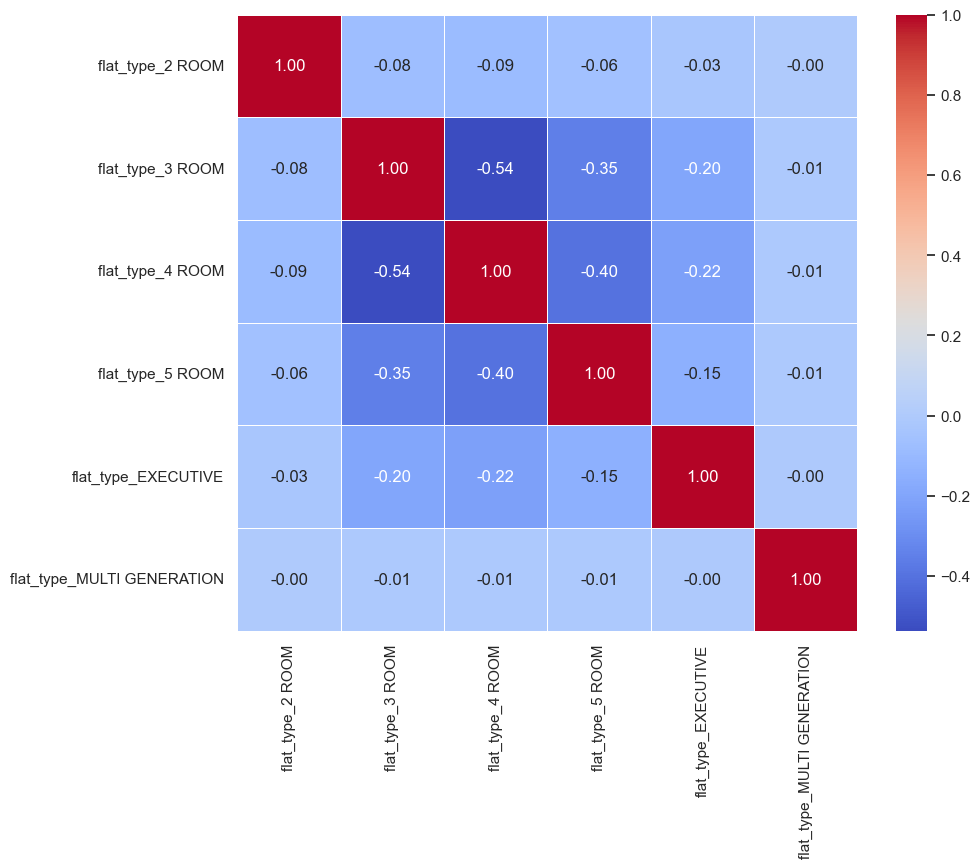

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X= df[['flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM',
       'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI GENERATION']]
# Assuming X is your feature matrix
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [24]:
vif_data

,Feature,VIF
0,flat_type_2 ROOM,1.0
1,flat_type_3 ROOM,1.0
2,flat_type_4 ROOM,1.0
3,flat_type_5 ROOM,1.0
4,flat_type_EXECUTIVE,1.0
5,flat_type_MULTI GENERATION,1.0


In [25]:
X = df.drop('resale_price', axis =1)
y = df['resale_price']

In [26]:
X

,floor_area_sqm,lease_commence_date,sales_year,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_PREMIUM MAISONETTE,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_TERRACE,flat_model_TYPE S1,flat_model_TYPE S2,sales_month_Q1,sales_month_Q2,sales_month_Q3,sales_month_Q4
0,31.0,1977,1990,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,31.0,1977,1990,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,31.0,1977,1990,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,31.0,1977,1990,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,73.0,1976,1990,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165274,104.0,1988,2023,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
165275,104.0,1988,2023,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
165276,112.0,2015,2023,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
165277,113.0,2016,2023,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30000)

In [28]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [29]:
lin_model.score(X_test, y_test)

0.8326690039264538

In [31]:
import pickle
with open('Singapore_Resale_Price_Model_lin_model.pickle','wb') as f:
    pickle.dump(lin_model, f)

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [60]:
rf_model.score(X_test, y_test)

0.9774280916362029

In [61]:
import pickle
with open('Singapore_Resale_Price_Model.pickle','wb') as f:
    pickle.dump(rf_model, f)

In [62]:
import json
columns = {'data_columns' : [col for col in X.columns]
          }
with open('columns.json','w') as f:
    f.write(json.dumps(columns))